In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statsmodels.api as sm

In [2]:
df = pd.read_csv("./crypto_data.csv")

In [3]:
df.sample(5)

,Unnamed: 0,Date,Adj Close_BTC-USD,Adj Close_ETH-USD,Adj Close_SOL-USD,Volume_BTC-USD,Volume_ETH-USD,Volume_SOL-USD
1210,1210,2024-04-25 00:00:00+00:00,64481.707031,3156.509521,144.892120,32155786816,13989030260,3674969172
1025,1025,2023-10-23 00:00:00+00:00,33086.234375,1765.382690,31.850985,38363572311,14362295879,1581590969
99,99,2021-04-10 00:00:00+00:00,59793.234375,2135.942139,26.841404,58238470525,24986243611,270235258
285,285,2021-10-13 00:00:00+00:00,57401.097656,3606.201660,148.176041,41684252783,16211275589,2105226551
606,606,2022-08-30 00:00:00+00:00,19796.808594,1523.838867,31.412056,34483360283,21835784470,861409804


In [4]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [5]:
df.sample(5)

,Date,Adj Close_BTC-USD,Adj Close_ETH-USD,Adj Close_SOL-USD,Volume_BTC-USD,Volume_ETH-USD,Volume_SOL-USD
273,2021-10-01 00:00:00+00:00,48116.941406,3307.516113,161.682373,42850641582,22307625573,4387488320
916,2023-07-06 00:00:00+00:00,29909.337891,1848.636475,19.729385,21129219509,8905008384,903770571
1114,2024-01-20 00:00:00+00:00,41665.585938,2469.589111,92.569839,11586690904,5297826161,1204443546
847,2023-04-28 00:00:00+00:00,29340.261719,1892.512817,23.366287,17544464887,7691759733,511781472
799,2023-03-11 00:00:00+00:00,20632.410156,1482.616699,18.225843,30180288176,14917080154,696894876


In [6]:
tickers = ['BTC-USD','ETH-USD','SOL-USD']

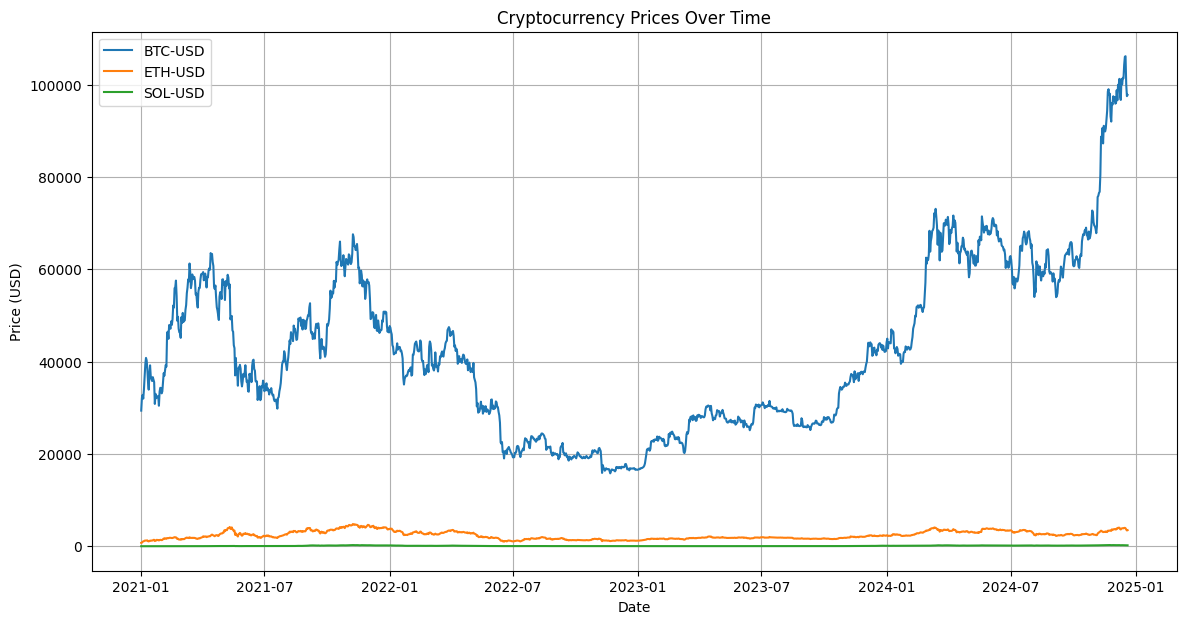

In [7]:
# Getting the close columns
close_columns = [i for i in df.columns if 'Close' in i]

# Formatting the date
df.Date = pd.to_datetime(df.Date)

# Plotting the three time series values
plt.figure(figsize=(14,7))
for ticker, close_col in zip(tickers,close_columns):
    plt.plot(df['Date'], df[close_col],label=ticker)

plt.title('Cryptocurrency Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

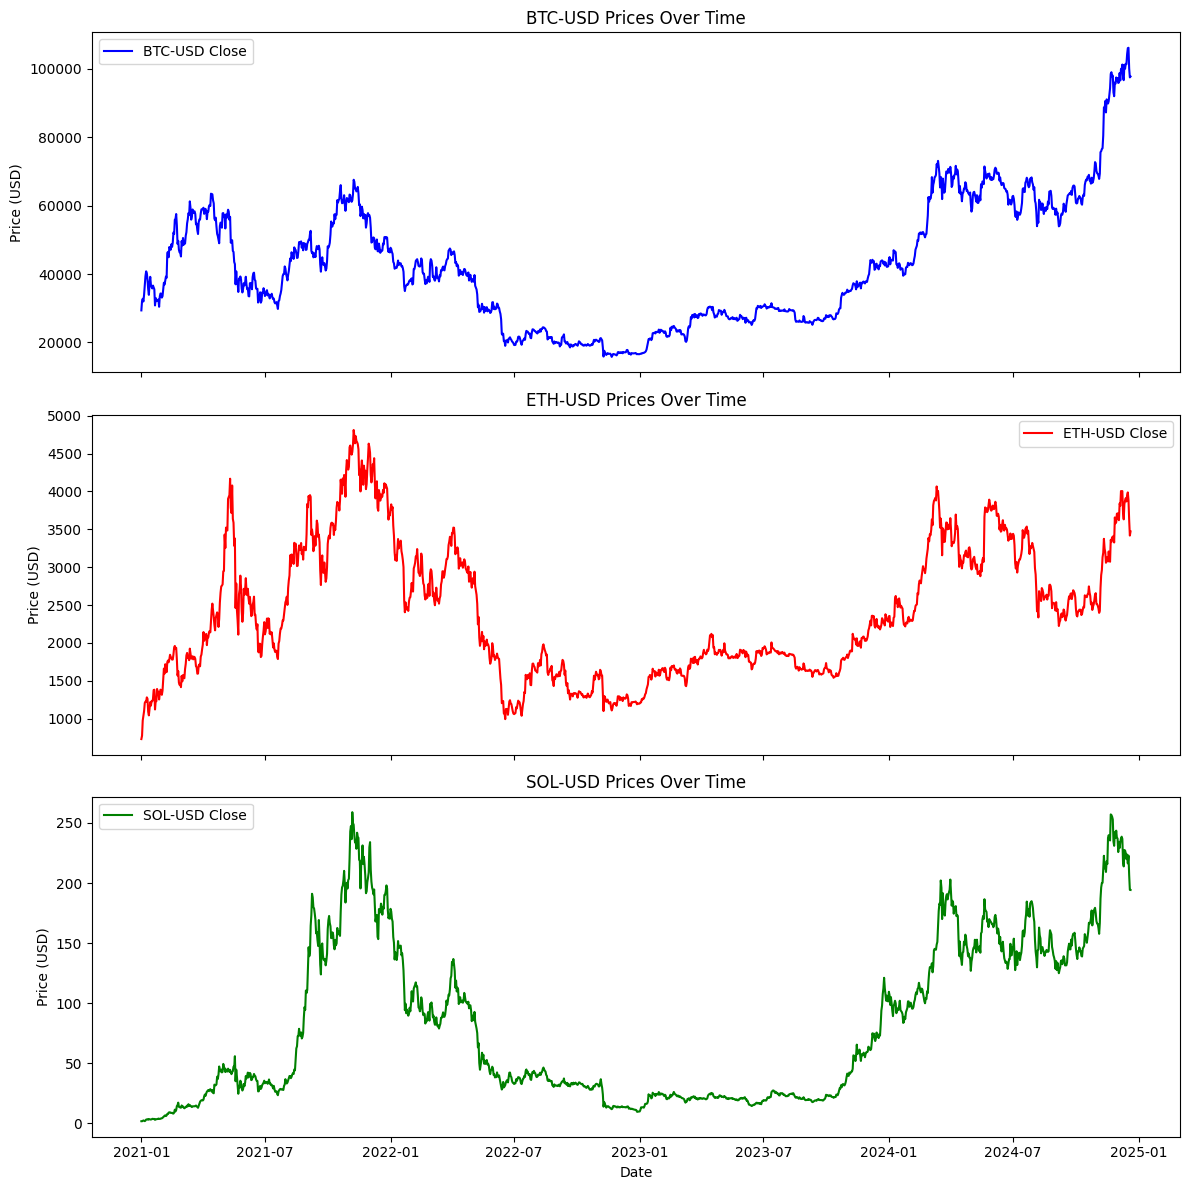

In [9]:
# Plotting the close values for the three currencies
colors = ['blue','red','green']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12), sharex=True)
for ax, ticker, close_col, col in zip(axes, tickers, close_columns, colors):
    ax.plot(df['Date'], df[close_col], label=f'{ticker} Close', color=col)
    ax.set_title(f'{ticker} Prices Over Time')
    ax.set_ylabel('Price (USD)')
    ax.legend()
    

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [13]:
# Making a rolling average plot
df['BTC-rolling'] = df["Adj Close_BTC-USD"].rolling(window=30).mean()

In [27]:
def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", figsize=(500,1000), font_size=15, title_font_size=20):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=figsize[1],
            height=figsize[0],
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            )
        )
    return fig

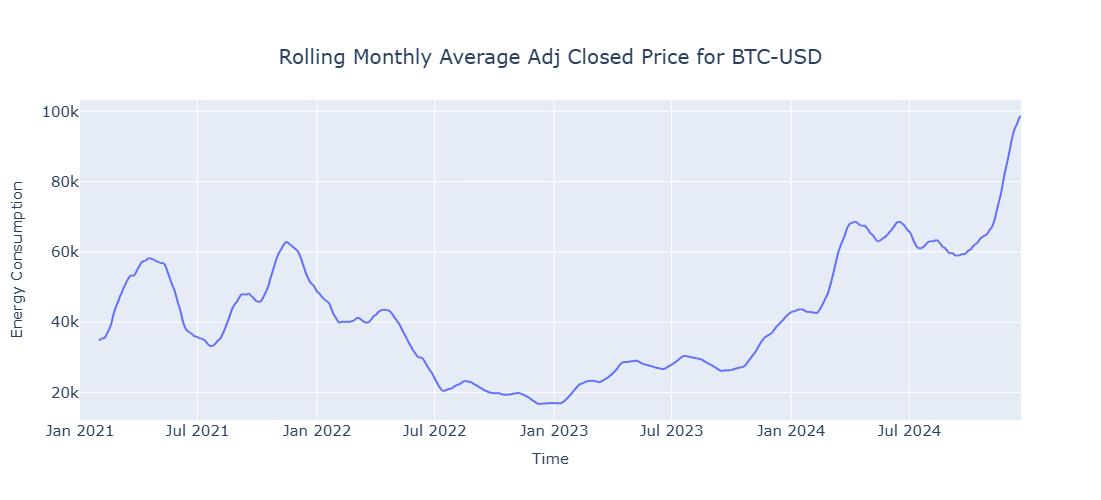

In [28]:
# Plotting the rolling average
fig = px.line(df, y="BTC-rolling", title="Rolling Monthly Average Adj Closed Price for BTC-USD",x='Date')
fig = format_plot(fig, ylabel="Energy Consumption")
fig.show()

In [32]:
# Seasonal Plots
ts_df = df.set_index('Date')

In [84]:
# Extracting the time variables
ts_df["weekday_name"] = ts_df.index.day_name()
ts_df["weekday"] = ts_df.index.weekday
ts_df["week"] = ts_df.index.isocalendar().week
ts_df["day"] = ts_df.index.day
ts_df["hour"] = ts_df.index.hour
ts_df["date"] = ts_df.index.date
ts_df["month"] = ts_df.index.month
ts_df["month_name"] = ts_df.index.month_name()
ts_df["year"] = ts_df.index.year
ts_df['quarter'] = ts_df.index.quarter

In [55]:
# Storing the monthly averages
plot_df = ts_df[ts_df.year.isin(range(2021,2025))].groupby(["year", "month_name"])[close_columns].mean().reset_index()

In [56]:
plot_df

,year,month_name,Adj Close_BTC-USD,Adj Close_ETH-USD,Adj Close_SOL-USD
0,2021,April,57206.720052,2297.672754,31.331174
1,2021,August,45709.022681,3098.384939,60.815578
2,2021,December,49263.209173,4044.742479,185.125281
3,2021,February,46306.798968,1699.808921,9.635357
4,2021,January,34761.649950,1202.502802,3.260222
5,2021,July,34444.973790,2131.080362,30.399264
6,2021,June,35845.154687,2335.792391,35.713352
7,2021,March,54998.008695,1736.862222,14.850674
8,2021,May,46443.286668,3140.730760,39.886821
9,2021,November,60621.488802,4434.128711,223.878649


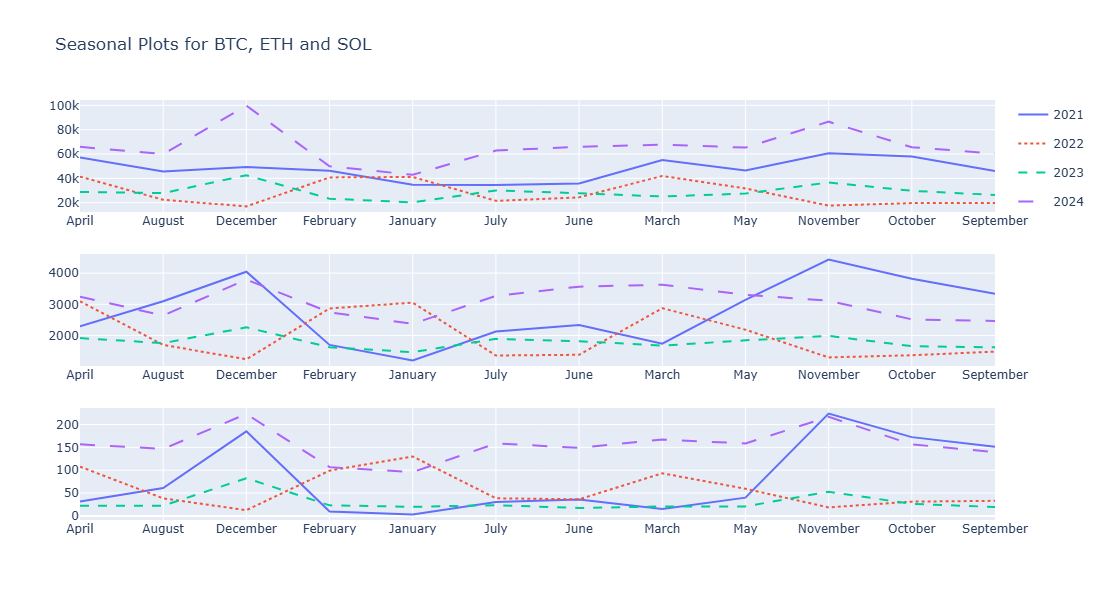

In [53]:
fig = make_subplots(rows=3, cols=1)

fig1 = px.line(plot_df,x='month_name',y=close_columns[0],color='year',line_dash="year", title="Seasonal Plot - Monthly")

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
    
fig2 = px.line(plot_df,x='month_name',y=close_columns[1],color='year',line_dash="year", title="Seasonal Plot - Monthly")

for trace in fig2.data:
    trace.showlegend = False
    fig.add_trace(trace, row=2, col=1)

fig3 = px.line(plot_df,x='month_name',y=close_columns[2],color='year',line_dash="year", title="Seasonal Plot - Monthly")

for trace in fig3.data:
    trace.showlegend = False
    fig.add_trace(trace, row=3, col=1)
fig.update_layout(height=600, width=1000, title_text="Seasonal Plots for BTC, ETH and SOL")
fig.show()

In [67]:
# Seasonal box plot
plot_df =  ts_df.groupby(["date","weekday_name", "month"])[close_columns[0]].mean().reset_index().dropna()

In [70]:
plot_df

,date,weekday_name,month,Adj Close_BTC-USD
0,2021-01-01,Friday,1,29374.152344
1,2021-01-02,Saturday,1,32127.267578
2,2021-01-03,Sunday,1,32782.023438
3,2021-01-04,Monday,1,31971.914062
4,2021-01-05,Tuesday,1,33992.429688
...,...,...,...,...
1445,2024-12-16,Monday,12,106029.718750
1446,2024-12-17,Tuesday,12,106140.601562
1447,2024-12-18,Wednesday,12,100041.539062
1448,2024-12-19,Thursday,12,97490.953125


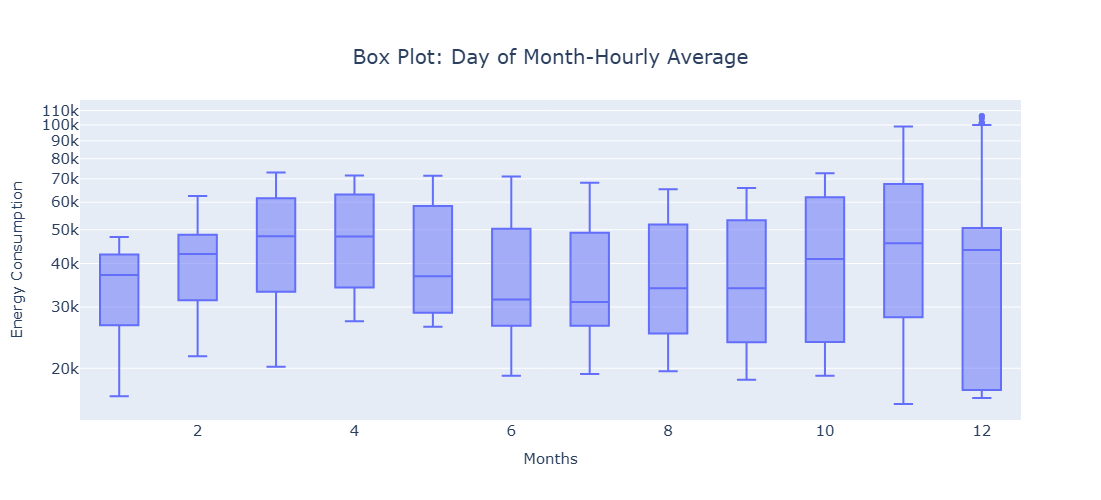

In [69]:
fig = px.box(plot_df, y=close_columns[0], x="month", log_y=True, title="Box Plot: Day of Month-Hourly Average")
fig = format_plot(fig, ylabel="Energy Consumption", xlabel="Months", legends=None)
fig.show()

In [82]:
def plot_seasonal_box_plot(seasonality, data, column):
    seasonal_dict = {
        1 : ['day','Days'],
        7 : ['week','Weeks'],
        30 : ['month','Months'],
        4 : ['quarter','Quarters']
    }
    plot_df =  data.groupby(["date","weekday_name", seasonal_dict[seasonality][0]])[column].mean().reset_index().dropna()
    fig = px.box(plot_df, y=close_columns[0], x=seasonal_dict[seasonality][0], log_y=True, title=f"Box Plot: {seasonal_dict[seasonality][1]} of {column}")
    fig = format_plot(fig, ylabel="Energy Consumption", xlabel=seasonal_dict[seasonality][1], legends=None)
    fig.show()

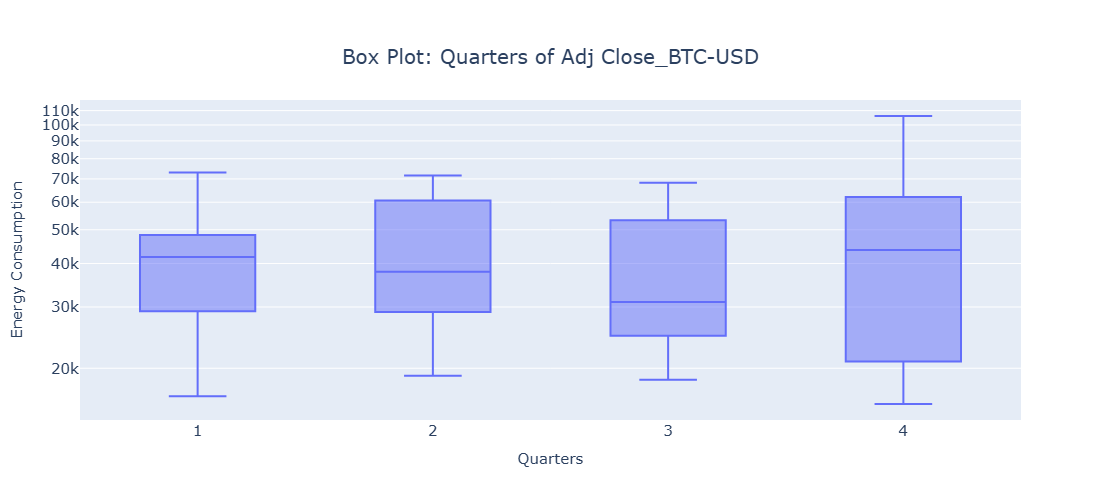

In [85]:
plot_seasonal_box_plot(4,ts_df,close_columns[0])

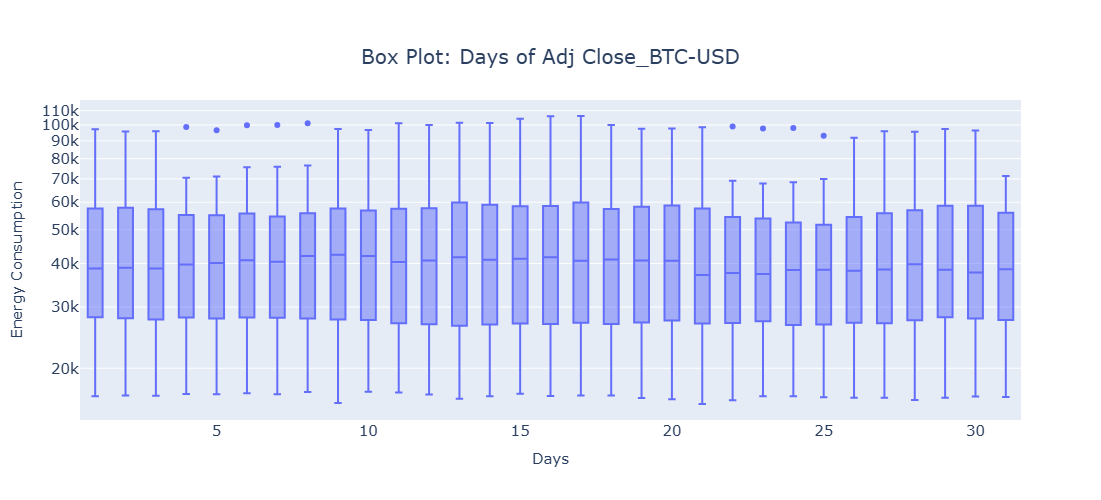

In [79]:
plot_seasonal_box_plot(1,ts_df,close_columns[0])

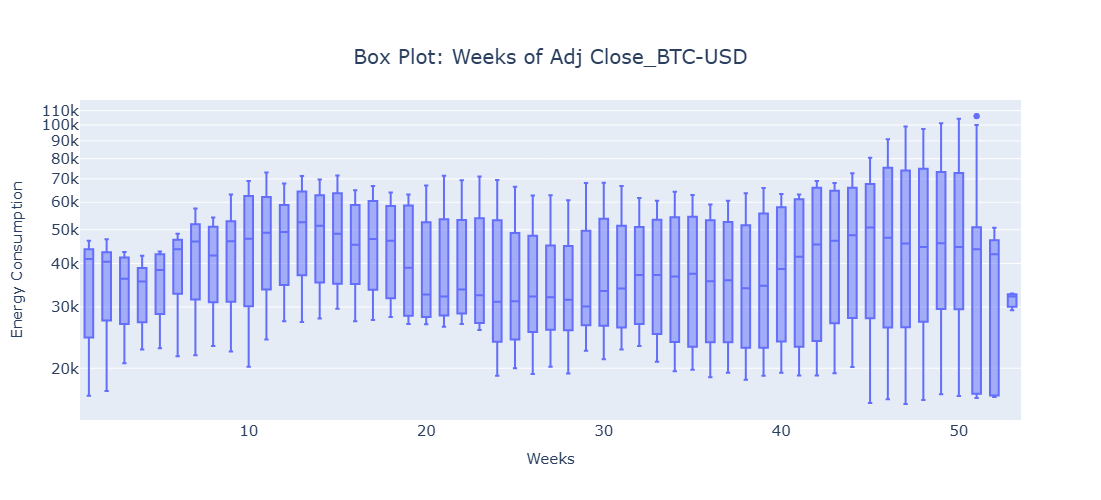

In [80]:
plot_seasonal_box_plot(7,ts_df,close_columns[0])

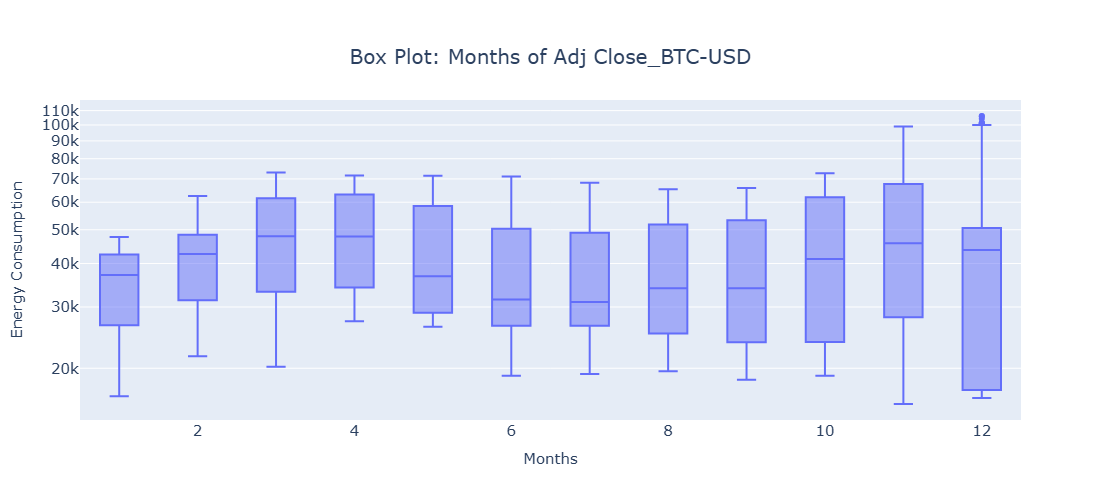

In [81]:
plot_seasonal_box_plot(30,ts_df,close_columns[0])

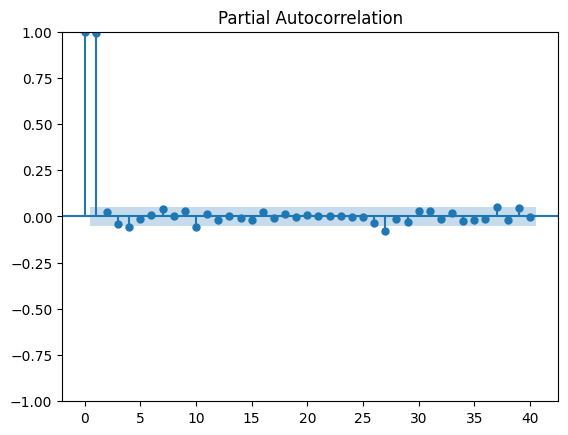

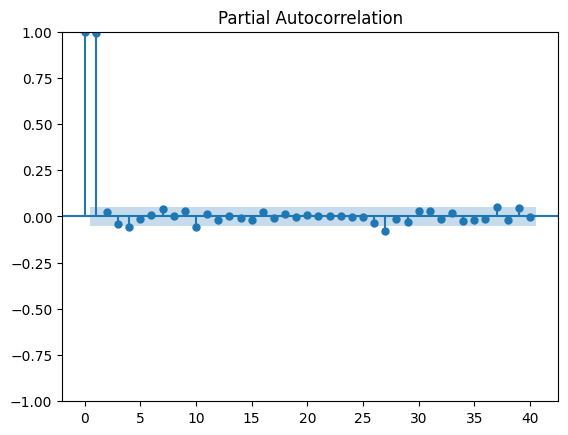

In [89]:
# Plotting autocorrelation plots
sm.graphics.tsa.plot_pacf(ts_df[close_columns[0]], lags=40, method="ywm")

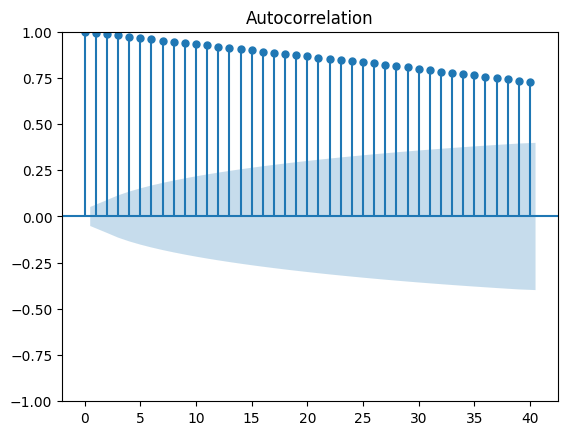

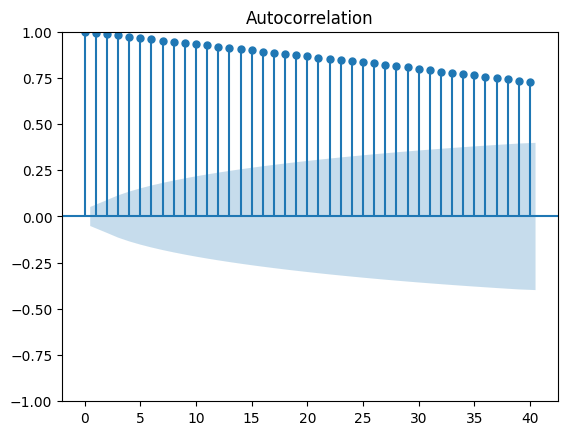

In [91]:
sm.graphics.tsa.plot_acf(ts_df[close_columns[0]], lags=40)

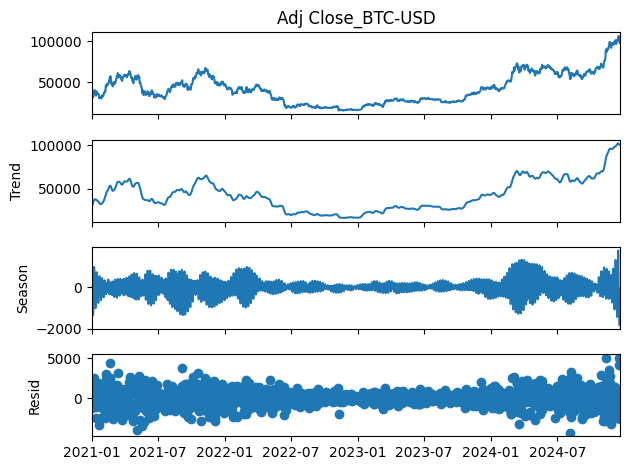

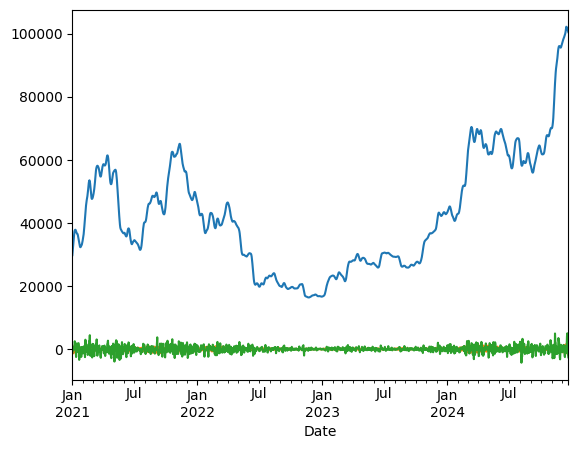

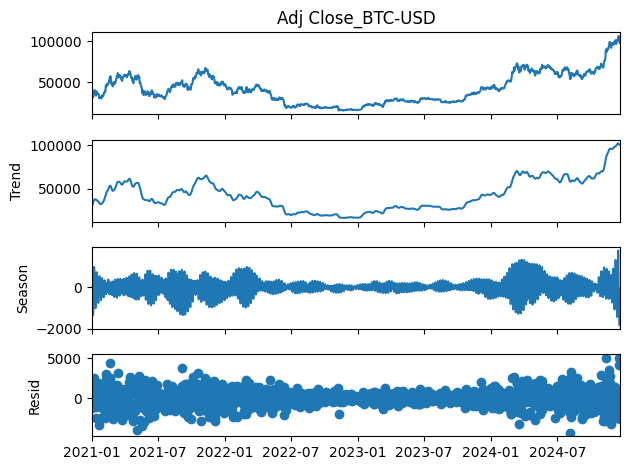

In [92]:
from statsmodels.tsa.seasonal import STL

series = ts_df[close_columns[0]]
stl = STL(series, seasonal=13)  
result = stl.fit()

# Access the components
result.trend.plot()
result.seasonal.plot()
result.resid.plot()
result.plot() 